In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, GridSearchCV
import seaborn as sns

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Заполням датасет данными

In [2]:
DATASET_PATH = './train.csv'
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [3]:
TEST_DATASET_PATH = './test.csv'
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,10379,29,2.0,43.177521,30.339945,5.0,6,5.0,1962,0.069660,B,B,31,6119,4,NaN,1,2,B
4996,16138,38,3.0,93.698122,94.521465,10.0,21,27.0,2018,0.060753,B,B,15,2787,2,520.0,0,7,B
4997,3912,101,1.0,33.656723,19.003259,5.0,2,5.0,1966,0.038693,B,B,28,6533,1,1015.0,2,5,B
4998,5722,10,1.0,38.635155,20.976257,9.0,8,14.0,1970,0.089040,B,B,33,7976,5,NaN,0,11,B
4999,11004,21,2.0,67.122742,33.944344,13.0,9,17.0,2009,0.194489,B,B,47,8004,3,125.0,3,5,B


## Знакомство с данными

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Поменяем типы данных для переменных: Id, DistrictId, Rooms и HouseFloor

In [5]:
df['Id'] = df['Id'].astype(str)
df['DistrictId'] = df['DistrictId'].astype(str)
df['HouseFloor'] = df['HouseFloor'].astype(int)

In [6]:
print('Строк в трейне:', df.shape[0])
print('Строк в тесте', test_df.shape[0])

Строк в трейне: 10000
Строк в тесте 5000


### Знакомство с целевой переменной

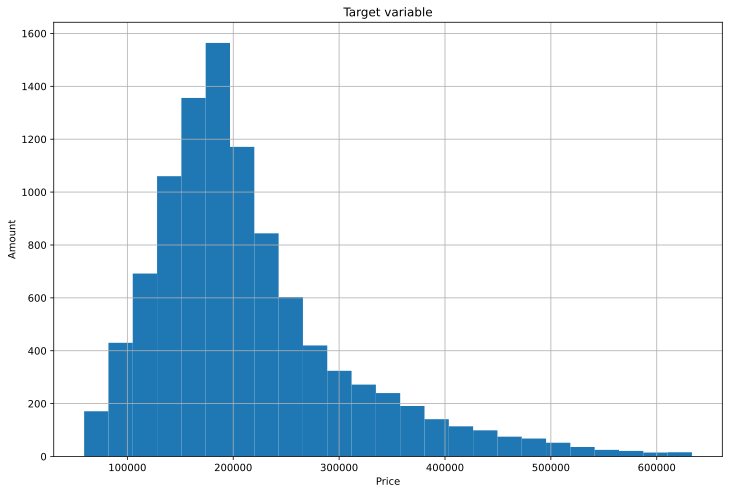

In [7]:
plt.figure(figsize = (12, 8))

df['Price'].hist(bins=25)
plt.ylabel('Amount')
plt.xlabel('Price')

plt.title('Target variable')
plt.show()

### Знакомство с вещественными признаками и исправление выбросов 

#### Rooms

In [8]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Как мы видим при значении Rooms >= 6 наблюдаются выбросы, так как Square очень маленькая

In [9]:
df.loc[df['Rooms'] >= 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2004,5927,57,10.0,59.056975,36.223072,10.0,22,22,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
2728,14865,9,10.0,60.871266,38.420681,10.0,3,2,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863
6088,8491,1,19.0,42.006046,21.779288,7.0,17,17,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
8794,14003,99,6.0,59.414334,38.702244,6.0,7,9,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416


In [10]:
df.loc[df['Rooms'] == 0, 'Rooms'] = 2
df.loc[df['Rooms'] >= 6, 'Rooms'] = df['Rooms'].median()

И переведем Rooms в тип int

In [11]:
df['Rooms'] = df['Rooms'].astype(int)

#### Square

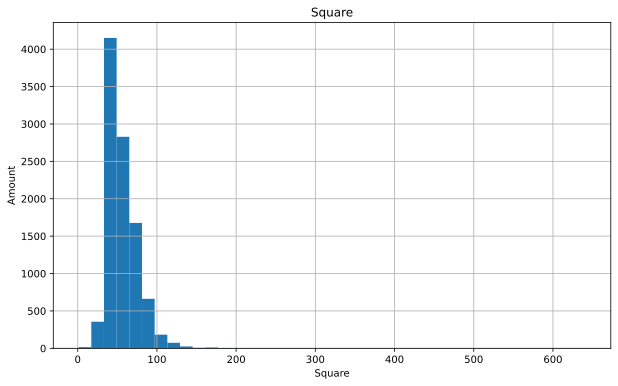

In [12]:
plt.figure(figsize = (10, 6))

df['Square'].hist(bins = 40)
plt.ylabel('Amount')
plt.xlabel('Square')

plt.title('Square')
plt.show()

Вроде все норм

#### LifeSquare

In [13]:
df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

In [14]:
df['KitchenSquare'].quantile(.996), df['KitchenSquare'].quantile(.025)

(26.004000000000815, 0.0)

Считаю значения неадекватными в тех случаях, когда кухня больше, чем квантиль 0.996 и меньше 4

In [15]:
condition = (df['KitchenSquare'].isna()) | (df['KitchenSquare'] > df['KitchenSquare'].quantile(.996))
        
df.loc[condition, 'KitchenSquare'] = df['KitchenSquare'].median()

df.loc[df['KitchenSquare'] <= 3, 'KitchenSquare'] = 4

#### Floor и HouseFloor

In [16]:
df['Floor'].value_counts()

4     949
5     876
3     872
6     802
7     759
8     643
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
28      3
32      2
42      1
33      1
37      1
31      1
Name: Floor, dtype: int64

In [17]:
df['HouseFloor'].value_counts()

17     2331
9      1389
12     1074
5      1031
14      625
16      576
1       497
25      374
22      343
0       269
24      176
8       141
10      135
4       134
3       127
15      123
19      108
20      105
18       89
7        59
6        58
2        48
23       40
21       33
11       28
13       27
30       21
40        7
27        6
32        4
37        4
28        3
99        2
39        2
48        2
26        1
36        1
44        1
38        1
29        1
117       1
31        1
45        1
47        1
Name: HouseFloor, dtype: int64

В МСК самое высокое здание имеет 75 этажей, значит этажность более 75 - выброс. Этажность меньше 3 тоже считаю выбросами

In [18]:
df.loc[df['HouseFloor'] > 75, 'HouseFloor'] = 17
df.loc[df['HouseFloor'] < 3, 'HouseFloor'] = 5

Обработка выбросов, где Floor > HouseFloor

In [19]:
(df['Floor'] > df['HouseFloor']).sum()

1562

In [20]:
df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df['HouseFloor']

In [21]:
(df['Floor'] > df['HouseFloor']).sum()

0

#### HouseYear

In [22]:
df['HouseYear'].unique()

array([    2014,     1966,     1988,     1977,     1972,     1968,
           1986,     2008,     1978,     2012,     1969,     2003,
           1981,     1962,     2015,     2018,     1976,     1985,
           1960,     2019,     1974,     1956,     1963,     1961,
           1979,     2006,     1953,     1973,     1982,     1965,
           2007,     2013,     1983,     1995,     1971,     2017,
           1964,     1991,     1990,     2016,     2011,     1984,
           1993,     1997,     2009,     1975,     2010,     1987,
           1935,     1970,     1967,     1989,     1959,     1996,
           2005,     1994,     1958,     2004,     1998,     1992,
           1980,     2000,     2002,     1954,     2001,     1999,
           1917,     1955,     1957,     1934,     2020,     1932,
           1942,     1940,     1937,     1941,     1939,     1931,
           1951,     1912,     1918,     1952,     1919,     1936,
           1930,     1938,     1950,     1933,     1929,     1

Год постройки не может быть больше 2020

In [23]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020

## Заполнение пропусков

In [24]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

#### LifeSquare

In [25]:
df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,115.027311,NaN,10.0
1,39.832524,23.169223,8.0
2,78.342215,47.671972,10.0
3,40.409907,NaN,4.0
4,64.285067,38.562517,9.0
5,62.528465,47.103833,6.0
6,33.938750,21.772930,9.0
7,50.391814,32.893256,8.0
8,46.887892,44.628132,4.0
9,79.867477,75.085125,4.0


Я заполнил LifeSquare как и в базовом решении, но вычитал не 3, а среднее значение разности Square с KitchenSquare и LifeSquare

In [26]:
condition = (df['LifeSquare'].isna()) \
             & (~df['Square'].isna()) \
             & (~df['KitchenSquare'].isna())

my_mean = df['Square'] - df['LifeSquare'] -  df['KitchenSquare']

df.loc[condition, 'LifeSquare'] = df.loc[condition, 'Square'] - df.loc[condition, 'KitchenSquare'] - my_mean.mean()

#### Healthcare_1

Так как отсутствует почти половина значений, удаляем эту строку, как и в базовом решении

In [27]:
df.drop('Healthcare_1', axis=1, inplace=True)

### Скрипты Python для подготовки данных

In [28]:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.medians = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.kitchen_square_quantile = X['KitchenSquare'].quantile(.996)
    
    def transform(self, X):
        """Трансформация данных"""

        # Rooms

        X.loc[X['Rooms'] == 0, 'Rooms'] = 2
        X.loc[X['Rooms'] >= 6, 'Rooms'] = self.medians['Rooms']
        X['Rooms'] = X['Rooms'].astype(int)
        
        # KitchenSquare
        condition = (X['KitchenSquare'].isna()) | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] <= 3, 'KitchenSquare'] = 4
        
        # HouseFloor, Floor
        X.loc[X['HouseFloor'] < 3, 'HouseFloor'] = 5
        X.loc[X['HouseFloor'] > 75, 'HouseFloor'] = 75
        
        floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
        X.loc[floor_outliers, 'Floor'] = X['HouseFloor']
        X['Floor'] = X['Floor'].astype(int)
        X['HouseFloor'] = X['HouseFloor'].astype(int)

        
        # HouseYear
        current_year = datetime.now().year
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
        # LifeSquare
        my_mean = df['Square'] - df['LifeSquare'] -  df['KitchenSquare']
        
        condition = (X['LifeSquare'].isna()) & \
                      (~X['Square'].isna()) & \
                      (~X['KitchenSquare'].isna())
        
        X.loc[condition, 'LifeSquare'] = X.loc[condition, 'Square'] - X.loc[condition, 'KitchenSquare'] - my_mean.mean()
        

        
        X.fillna(self.medians, inplace=True)
        
        return X

## Построение новых признаков

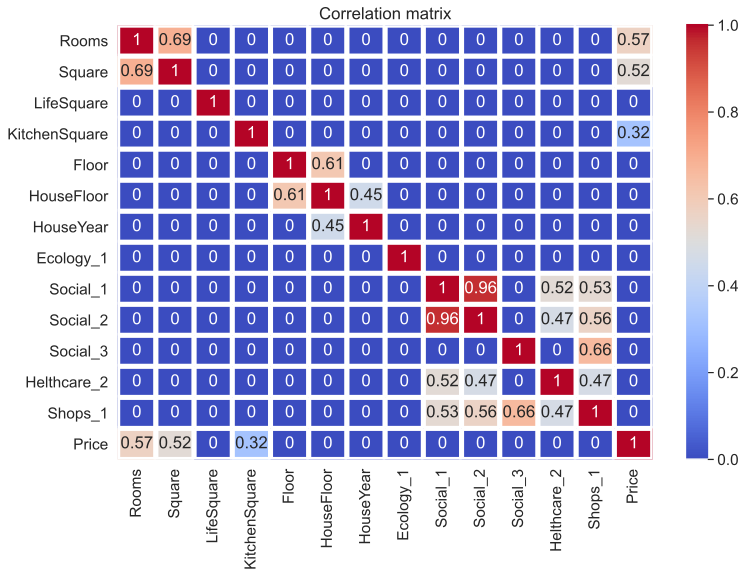

In [29]:
plt.figure(figsize = (12, 8))

sns.set(font_scale = 1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot = True, linewidths = 5, cmap = 'coolwarm')

plt.title('Correlation matrix')
plt.show()

#### Замена бинарных выражений на вещественные

In [30]:
binary_to_numbers = {'A': 0, 'B': 1}

df['Ecology_2'] = df['Ecology_2'].replace(binary_to_numbers)
df['Ecology_3'] = df['Ecology_3'].replace(binary_to_numbers)
df['Shops_2'] = df['Shops_2'].replace(binary_to_numbers)

#### DistrictSize и IsDistrictLarge как в базовом решении

In [31]:
df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
205      1
196      1
117      1
209      1
Name: DistrictId, Length: 205, dtype: int64

In [32]:
district_size = df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [33]:
df = df.merge(district_size, on='DistrictId', how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize
0,11809,27,3,115.027311,94.322225,10.0,4,10,2014,0.075424,1,1,11,3097,0,0,0,1,305018.871089,851
1,3013,22,1,39.832524,23.169223,8.0,7,8,1966,0.118537,1,1,30,6207,1,1,0,1,177734.553407,78
2,8215,1,3,78.342215,47.671972,10.0,2,17,1988,0.025609,1,1,33,5261,0,3,1,1,282078.720850,652
3,2352,1,1,40.409907,25.704821,4.0,10,22,1977,0.007122,1,1,1,264,0,0,1,1,168106.007630,652
4,13866,94,2,64.285067,38.562517,9.0,16,16,1972,0.282798,1,1,33,8667,2,0,6,1,343995.102962,89


In [34]:
(df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [35]:
df['IsDistrictLarge'] = (df['DistrictSize'] > 100).astype(int)
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge
0,11809,27,3,115.027311,94.322225,10.0,4,10,2014,0.075424,...,1,11,3097,0,0,0,1,305018.871089,851,1
1,3013,22,1,39.832524,23.169223,8.0,7,8,1966,0.118537,...,1,30,6207,1,1,0,1,177734.553407,78,0
2,8215,1,3,78.342215,47.671972,10.0,2,17,1988,0.025609,...,1,33,5261,0,3,1,1,282078.720850,652,1
3,2352,1,1,40.409907,25.704821,4.0,10,22,1977,0.007122,...,1,1,264,0,0,1,1,168106.007630,652,1
4,13866,94,2,64.285067,38.562517,9.0,16,16,1972,0.282798,...,1,33,8667,2,0,6,1,343995.102962,89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2,49.090728,33.272626,6.0,3,12,1981,0.300323,...,1,52,10311,6,1,9,1,119367.455796,118,1
9996,16265,27,2,64.307684,37.038420,9.0,5,5,1977,0.072158,...,1,2,629,1,0,0,0,199715.148807,851,1
9997,2795,178,1,29.648057,16.555363,5.0,3,5,1958,0.460556,...,1,20,4386,14,1,5,1,165953.912580,7,0
9998,14561,21,1,32.330292,22.326870,5.0,3,9,1969,0.194489,...,1,47,8004,3,3,5,1,171842.411855,165,1


#### HouseYear

Предсказание средней цены по году постройки дома и количеству комнат

In [36]:
est_price_by_year = df.groupby(['HouseYear', 'Rooms'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'EstPriceByYear'})

est_price_by_year

,HouseYear,Rooms,EstPriceByYear
0,1910,1,287954.720682
1,1912,1,262279.813915
2,1912,4,284884.959104
3,1914,2,423580.477982
4,1916,3,284608.939261
...,...,...,...
319,2019,3,280442.953786
320,2019,4,410685.266698
321,2020,1,162260.682278
322,2020,2,264704.182761


In [37]:
df = df.merge(est_price_by_year, on=['HouseYear', 'Rooms'], how='left')
df.drop('Id', axis=1, inplace=True)

In [38]:
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,EstPriceByYear
0,27,3,115.027311,94.322225,10.0,4,10,2014,0.075424,1,...,11,3097,0,0,0,1,305018.871089,851,1,212018.815190
1,22,1,39.832524,23.169223,8.0,7,8,1966,0.118537,1,...,30,6207,1,1,0,1,177734.553407,78,0,152851.632587
2,1,3,78.342215,47.671972,10.0,2,17,1988,0.025609,1,...,33,5261,0,3,1,1,282078.720850,652,1,342847.734626
3,1,1,40.409907,25.704821,4.0,10,22,1977,0.007122,1,...,1,264,0,0,1,1,168106.007630,652,1,131457.715256
4,94,2,64.285067,38.562517,9.0,16,16,1972,0.282798,1,...,33,8667,2,0,6,1,343995.102962,89,0,203190.436482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2,49.090728,33.272626,6.0,3,12,1981,0.300323,1,...,52,10311,6,1,9,1,119367.455796,118,1,235404.568069
9996,27,2,64.307684,37.038420,9.0,5,5,1977,0.072158,1,...,2,629,1,0,0,0,199715.148807,851,1,182395.443963
9997,178,1,29.648057,16.555363,5.0,3,5,1958,0.460556,1,...,20,4386,14,1,5,1,165953.912580,7,0,165953.912580
9998,21,1,32.330292,22.326870,5.0,3,9,1969,0.194489,1,...,47,8004,3,3,5,1,171842.411855,165,1,158636.016560


#### Social

Предсказание средней цены по Social_3 и Shops_1

In [39]:
est_price_by_social = df.groupby(['Social_3', 'Shops_1'], as_index=False).agg({'Price':'median'})\
                            .rename(columns={'Price':'EstPriceBySocial'})

est_price_by_social

,Social_3,Shops_1,EstPriceBySocial
0,0,0,145822.098031
1,0,1,175679.976546
2,0,2,174465.567944
3,0,3,253080.425473
4,0,4,247896.683162
...,...,...,...
83,73,5,343589.405088
84,84,5,259418.640059
85,87,5,438061.703276
86,93,10,319736.586892


In [40]:
df = df.merge(est_price_by_social, on=['Social_3', 'Shops_1'], how='left')
df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,DistrictSize,IsDistrictLarge,EstPriceByYear,EstPriceBySocial
0,27,3,115.027311,94.322225,10.0,4,10,2014,0.075424,1,...,3097,0,0,0,1,305018.871089,851,1,212018.815190,145822.098031
1,22,1,39.832524,23.169223,8.0,7,8,1966,0.118537,1,...,6207,1,1,0,1,177734.553407,78,0,152851.632587,170905.771956
2,1,3,78.342215,47.671972,10.0,2,17,1988,0.025609,1,...,5261,0,3,1,1,282078.720850,652,1,342847.734626,175679.976546
3,1,1,40.409907,25.704821,4.0,10,22,1977,0.007122,1,...,264,0,0,1,1,168106.007630,652,1,131457.715256,175679.976546
4,94,2,64.285067,38.562517,9.0,16,16,1972,0.282798,1,...,8667,2,0,6,1,343995.102962,89,0,203190.436482,203153.518639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,61,2,49.090728,33.272626,6.0,3,12,1981,0.300323,1,...,10311,6,1,9,1,119367.455796,118,1,235404.568069,223982.521830
9996,27,2,64.307684,37.038420,9.0,5,5,1977,0.072158,1,...,629,1,0,0,0,199715.148807,851,1,182395.443963,170905.771956
9997,178,1,29.648057,16.555363,5.0,3,5,1958,0.460556,1,...,4386,14,1,5,1,165953.912580,7,0,165953.912580,244852.013738
9998,21,1,32.330292,22.326870,5.0,3,9,1969,0.194489,1,...,8004,3,3,5,1,171842.411855,165,1,158636.016560,175578.761617


### Скрипты Python для генерации новых признаков

In [41]:
class FeatureGenetator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_price_by_district = None
        self.med_price_by_floor_year = None
        self.house_year_max = None
        self.floor_max = None
        self.district_size = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        # Target encoding
        ## Year, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.est_price_by_year = df.groupby(['HouseYear', 'Rooms'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'EstPriceByYear'})
            
            self.est_price_by_year_median = self.est_price_by_year['EstPriceByYear'].median()
            
        # Social, Shops 
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.est_price_by_social = df.groupby(['Social_3', 'Shops_1'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'EstPriceBySocial'})
            
            self.est_price_by_social_median = self.est_price_by_social['EstPriceBySocial'].median()


        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(int)
        
        # Target encoding
        if self.est_price_by_social is not None:
            X = X.merge(self.est_price_by_social, on=['Social_3', 'Shops_1'], how='left')
            X.fillna(self.est_price_by_social_median, inplace=True)
            
        if self.est_price_by_year is not None:
            X = X.merge(self.est_price_by_year, on=['HouseYear', 'Rooms'], how='left')
            X.fillna(self.est_price_by_year_median, inplace=True)
        
        return X

## Разбиение данных на train и valid

In [42]:
train_df = pd.read_csv(DATASET_PATH)
test_df = pd.read_csv('./test.csv')

X = train_df.drop(columns = 'Price')
X = X.drop(columns='Id')
y = train_df['Price']

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [44]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape

((6700, 17), (3300, 17))

In [45]:
features = FeatureGenetator()
features.fit(X_train, y_train)

X_train = features.transform(X_train)
X_valid = features.transform(X_valid)
test_df = features.transform(test_df)

X_train.shape, X_valid.shape

((6700, 21), (3300, 21))

## Построение модели

#### LinearRegression

In [51]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_valid)

In [53]:
check_test = pd.DataFrame({
    "y_valid": y_valid,
    "y_pred": y_pred.flatten(),
})

check_test

,y_test,y_pred
6252,225202.099645,236415.946376
4684,361744.269547,178378.247394
1731,275055.182201,222902.235331
4742,198133.702204,202919.906235
4521,221299.460377,177695.919145
...,...,...
1744,173816.246218,167069.853701
9754,93493.642802,145309.813439
6094,174858.771704,154764.344837
8781,134462.489169,128689.047705


In [56]:
cv_score = cross_val_score(model_lr, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.63680815, 0.64610094, 0.61547994])

#### RandomForestRegressor

In [57]:
model_rf = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_valid)

In [58]:
check_test = pd.DataFrame({
    "y_valid": y_valid,
    "y_pred": y_pred.flatten(),
})

check_test

,y_valid,y_pred
6252,225202.099645,227104.252922
4684,361744.269547,203466.187502
1731,275055.182201,231544.973574
4742,198133.702204,188705.633120
4521,221299.460377,181643.110526
...,...,...
1744,173816.246218,183789.746238
9754,93493.642802,86151.237356
6094,174858.771704,182875.071517
8781,134462.489169,146101.325496


In [59]:
cv_score = cross_val_score(model_rf, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.73720117, 0.7477023 , 0.74141525])

In [60]:
cv_score.mean()

0.7421062435749407

In [63]:
r2_score(y_valid, y_pred)

0.7005282071691313

## Предсказание на тестовых данных

In [74]:
test_df = test_df.drop(columns='Id')

In [79]:
test_df

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,DistrictSize,IsDistrictLarge,EstPriceBySocial,EstPriceByYear
0,44,1,36.847630,19.094182,5.0,5,9,1970,0.036122,1,...,24,4378,0,1,1,1,70.0,0,175434.467381,165361.498469
1,62,1,42.493907,42.568133,10.0,7,17,2017,0.072158,1,...,2,629,1,0,0,0,164.0,1,172184.661213,141058.045756
2,27,2,59.463678,39.758593,9.0,19,19,1977,0.211401,1,...,9,1892,0,0,1,1,568.0,1,175434.467381,183118.396487
3,23,3,49.646030,33.893825,6.0,2,5,1965,0.014073,1,...,2,475,0,0,0,1,375.0,1,143280.516002,230916.959554
4,74,1,53.837056,39.131970,4.0,8,17,1977,0.309479,1,...,35,7715,4,0,6,1,76.0,0,214881.346605,131759.438891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,2,43.177521,30.339945,5.0,5,5,1962,0.069660,1,...,31,6119,4,1,2,1,59.0,0,183675.760667,200765.911129
4996,38,3,93.698122,94.521465,10.0,21,27,2018,0.060753,1,...,15,2787,2,0,7,1,25.0,0,314803.123363,256214.703439
4997,101,1,33.656723,19.003259,5.0,2,5,1966,0.038693,1,...,28,6533,1,2,5,1,69.0,0,182005.446619,154913.048543
4998,10,1,38.635155,20.976257,9.0,8,14,1970,0.089040,1,...,33,7976,5,0,11,1,35.0,0,217009.909079,165361.498469


In [83]:
test_pred = model_rf.predict(test_df)
test_pred

array([161368.82881354, 124499.6595685 , 141308.5282299 , ...,
       146980.20764508, 194700.94026953, 261633.40408181])